Question 4: After what amount of tenure, a normal user is at its peak in FB (in terms of friend_count/likes)? For this we can convert the tenure in days into years (by rounding off to the whole number) and then can apply grouping for ‘Age’ & ’Tenure’  (and if needed can add gender as well) , to show when a particular user is at its peak if one joins at certain age and spends a certain amount of time.. (May be we can club this aspect with any other above mentioned case)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('C:/Manoj/Data Science/Foundation Projects/Facebook/pseudo_facebook.tsv',delimiter='\t')
df.head(5)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [3]:
df['tenure_yrs']=df['tenure']/365
df['tenure_yrs']=df['tenure_yrs'].apply(np.ceil)
df.head(5)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,tenure_yrs
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,1.0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,1.0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,1.0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,1.0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,1.0


In [18]:
likes_df=df[['tenure_yrs','likes_received']]
likes_df=likes_df.groupby('tenure_yrs').mean().unstack().reset_index()
likes_df['avglikesyr']=likes_df[0]/likes_df['tenure_yrs']
likes_df

,level_0,tenure_yrs,0,avglikesyr
0,likes_received,0.0,6.300000,inf
1,likes_received,1.0,102.525833,102.525833
2,likes_received,2.0,154.402925,77.201463
3,likes_received,3.0,194.661866,64.887289
4,likes_received,4.0,208.847100,52.211775
5,likes_received,5.0,218.675883,43.735177
6,likes_received,6.0,216.392833,36.065472
7,likes_received,7.0,202.681583,28.954512
8,likes_received,8.0,238.733333,29.841667
9,likes_received,9.0,481.888889,53.543210


In [19]:
likes_df=likes_df[['tenure_yrs','avglikesyr']]
likes_df

,tenure_yrs,avglikesyr
0,0.0,inf
1,1.0,102.525833
2,2.0,77.201463
3,3.0,64.887289
4,4.0,52.211775
5,5.0,43.735177
6,6.0,36.065472
7,7.0,28.954512
8,8.0,29.841667
9,9.0,53.543210


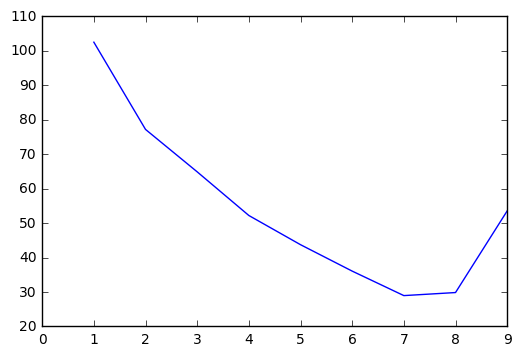

In [17]:
%matplotlib inline
likes_df['avglikesyr'].plot()

In [20]:
female_likes_df=df[df['gender']=='female']
female_likes_df=female_likes_df[['tenure_yrs','likes_received']]
female_likes_df=female_likes_df.groupby('tenure_yrs').mean().unstack().reset_index()
female_likes_df['avglikesyr']=female_likes_df[0]/female_likes_df['tenure_yrs']
female_likes_df=female_likes_df[['tenure_yrs','avglikesyr']]
female_likes_df

,tenure_yrs,avglikesyr
0,0.0,inf
1,1.0,188.248959
2,2.0,136.906408
3,3.0,109.303464
4,4.0,83.291749
5,5.0,63.156336
6,6.0,48.835561
7,7.0,42.906733
8,8.0,39.050000
9,9.0,78.500000


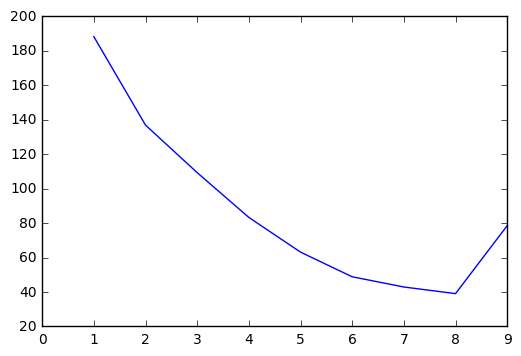

In [19]:
female_likes_df['avglikesyr'].plot()

In [20]:
male_likes_df=df[df['gender']=='male']
male_likes_df=male_likes_df[['tenure_yrs','likes_received']]
male_likes_df=male_likes_df.groupby('tenure_yrs').mean().unstack().reset_index()
male_likes_df['avglikesyr']=male_likes_df[0]/male_likes_df['tenure_yrs']
male_likes_df=male_likes_df[['tenure_yrs','avglikesyr']]
male_likes_df

,tenure_yrs,avglikesyr
0,0.0,inf
1,1.0,51.147892
2,2.0,36.004052
3,3.0,33.052748
4,4.0,25.256947
5,5.0,20.521130
6,6.0,18.792830
7,7.0,12.377143
8,8.0,14.031250
9,9.0,3.629630


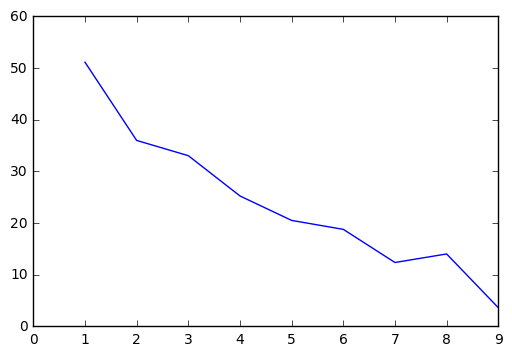

In [21]:
male_likes_df['avglikesyr'].plot()

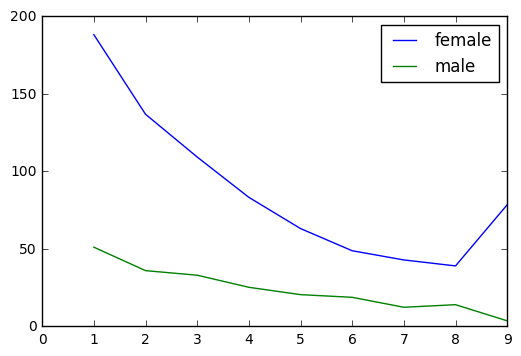

In [22]:
gender_likes=pd.merge(female_likes_df, male_likes_df, on='tenure_yrs')
gender_likes.columns=['tenure_yrs','female','male']
gender_likes[['female','male']].plot()

Conclusion: 
Most users will receive the most likes in their first year of joining facebook and over the years the number of likes they receive will drop. This will bottom on the 8 years, and they will start to see a steady raise in the likes they received thereafter.

The contribution of Males likes received seem to be insignificant in this case. As can be seen that the shape of the two charts seem to be more similiar with female likes received.

The conculsion is more suitable make towards female facebook user. As can be seen from the last graph, male user has seen a steady decline in likes received over the years. And no bottom in sight.

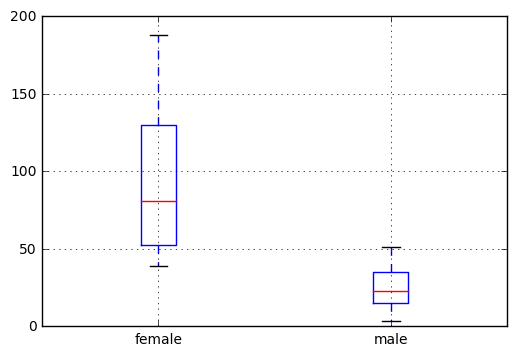

In [24]:
gender_likes[['female','male']].boxplot()

Female received an mean of 75 like received while male received around 20 likes per year. 